In [2]:
import random
from typing_extensions import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from langgraph.types import Command

In [3]:
class State(TypedDict):
    foo: str

In [4]:
def node_a(state: State) -> Command[Literal["node_b", "node_c"]]:
    print("Called A")
    value = random.choice(["a","b"])
    if value == "a":
        goto ="node_b"
    else:
        goto="node_c"

    return Command(
        update={"foo": value},
        goto=goto
    )



In [5]:
def node_b(state:State):
    print("Called B")
    return {"foo": state["foo"] + "b"}

In [6]:
def node_c(state: State):
    print("Called C")
    return {"foo": state["foo"] + "c"}

In [8]:
builder = StateGraph(State)
builder.add_edge(START, "node_a")
builder.add_node(node_a)
builder.add_node(node_b)
builder.add_node(node_c)

In [9]:
graph = builder.compile()

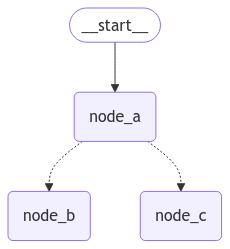

In [10]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
graph.invoke({"foo": ""})

Called A
Called C


{'foo': 'bc'}